**TITLE: EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA LOADING AND CLEANING

In [ ]:
!pip install chardet
import pandas as pd
import chardet
with open("/content/superstore_dataset2011-2015.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
pd.set_option('display.max_columns', None)

# 1. loading and cleaning dataset
data = pd.read_csv("/content/superstore_dataset2011-2015.csv", encoding=encoding)

In [ ]:
#displaying the dataset

data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4.0,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13466,49974,PL-2014-240,1/9/2014,5/9/2014,Standard Class,AJ-795,Anthony Johnson,Corporate,Tarnow,Lesser Poland,Poland,NaN,EMEA,EMEA,FUR-SAF-10002757,Furniture,Chairs,"SAFCO Rocking Chair, Red",134.910,1.0,0.0,6.7200,13.75,Medium
13467,40960,CA-2014-132619,1/9/2014,6/9/2014,Standard Class,MS-17770,Maxwell Schwartz,Consumer,San Francisco,California,United States,94109.0,US,West,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,193.950,3.0,0.0,9.6975,12.65,Medium
13468,3543,MX-2014-145737,1/9/2014,5/9/2014,Standard Class,RD-19810,Ross DeVincentis,Home Office,Managua,Managua,Nicaragua,NaN,LATAM,Central,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.160,8.0,0.0,90.7200,12.58,High
13469,16757,ES-2014-2901676,1/9/2014,5/9/2014,Standard Class,TB-21250,Tim Brockman,Consumer,Hanover,Lower Saxony,Germany,NaN,EU,Central,OFF-AR-10001068,Office Supplies,Art,"BIC Sketch Pad, Easy-Erase",122.325,5.0,0.5,-0.0750,12.48,High


In [ ]:
#first 5 rows of data

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4.0,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.770,4.70,Medium


In [ ]:
#last 5 rows of data

data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
13466,49974,PL-2014-240,1/9/2014,5/9/2014,Standard Class,AJ-795,Anthony Johnson,Corporate,Tarnow,Lesser Poland,Poland,NaN,EMEA,EMEA,FUR-SAF-10002757,Furniture,Chairs,"SAFCO Rocking Chair, Red",134.910,1.0,0.0,6.7200,13.75,Medium
13467,40960,CA-2014-132619,1/9/2014,6/9/2014,Standard Class,MS-17770,Maxwell Schwartz,Consumer,San Francisco,California,United States,94109.0,US,West,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,193.950,3.0,0.0,9.6975,12.65,Medium
13468,3543,MX-2014-145737,1/9/2014,5/9/2014,Standard Class,RD-19810,Ross DeVincentis,Home Office,Managua,Managua,Nicaragua,NaN,LATAM,Central,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.160,8.0,0.0,90.7200,12.58,High
13469,16757,ES-2014-2901676,1/9/2014,5/9/2014,Standard Class,TB-21250,Tim Brockman,Consumer,Hanover,Lower Saxony,Germany,NaN,EU,Central,OFF-AR-10001068,Office Supplies,Art,"BIC Sketch Pad, Easy-Erase",122.325,5.0,0.5,-0.0750,12.48,High
13470,7741,MX-2014-116897,1/9/2014,6/9/2014,Standard Class,TB-21355,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#list of columns in the dataset

data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
#count of null values

data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               1
City                  1
State                 1
Country               1
Postal Code       10749
Market                1
Region                1
Product ID            1
Category              1
Sub-Category          1
Product Name          1
Sales                 1
Quantity              1
Discount              1
Profit                1
Shipping Cost         1
Order Priority        1
dtype: int64

In [ ]:
#removing null values

data.dropna(inplace=True)

In [ ]:
#replacing null values with 0

data.fillna(value=0, inplace=True)

In [ ]:
#checking null values after replacing null values

data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [ ]:
#finding the number duplicate values

print("The No. of Duplicated values are ", data.duplicated().sum())

The No. of Duplicated values are  0


In [ ]:
#finding the number of unique values

data.nunique()

Row ID            2722
Order ID          1353
Order Date         366
Ship Date          486
Ship Mode            4
Customer ID        645
Customer Name      645
Segment              3
City               317
State               46
Country              1
Postal Code        386
Market               1
Region               4
Product ID        1391
Category             3
Sub-Category        17
Product Name      1370
Sales             2190
Quantity            14
Discount            12
Profit            2412
Shipping Cost     1599
Order Priority       4
dtype: int64

In [ ]:
#finding the data types of each columns

data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity          float64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

DESCRIPTIVE STATISTICS

In [ ]:
# 2. Descriptive Statistics

data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000
mean,36269.506613,53822.056576,228.026492,3.757164,0.154155,31.331208,22.977127
std,2889.357078,32123.304812,601.843001,2.189521,0.202522,231.664298,55.376395
min,31297.000000,1040.000000,0.898000,1.000000,0.000000,-1850.946400,0.010000
25%,33826.750000,21215.000000,17.940000,2.000000,0.000000,2.025600,1.550000
50%,36289.500000,53209.000000,56.230000,3.000000,0.200000,8.997750,5.160000
75%,38799.000000,88537.500000,206.778000,5.000000,0.200000,31.062750,20.327500
max,41277.000000,99301.000000,17499.950000,14.000000,0.800000,8399.976000,846.540000


In [ ]:
data.mean()

<ipython-input-17-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Row ID           36269.506613
Postal Code      53822.056576
Sales              228.026492
Quantity             3.757164
Discount             0.154155
Profit              31.331208
Shipping Cost       22.977127
dtype: float64

In [ ]:
data.median()

<ipython-input-18-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


Row ID           36289.50000
Postal Code      53209.00000
Sales               56.23000
Quantity             3.00000
Discount             0.20000
Profit               8.99775
Shipping Cost        5.16000
dtype: float64

In [ ]:
print('Mode value of Sales ',data['Sales'].mode())
print('Mode value of Quantity ',data['Quantity'].mode())
print('Mode value of Discount ',data['Discount'].mode())
print('Mode value of Profit ',data['Profit'].mode())
print('Mode value of Shipping Cost ',data['Shipping Cost'].mode())

Mode value of Sales  0    12.96
Name: Sales, dtype: float64
Mode value of Quantity  0    2.0
Name: Quantity, dtype: float64
Mode value of Discount  0    0.0
Name: Discount, dtype: float64
Mode value of Profit  0    0.0
Name: Profit, dtype: float64
Mode value of Shipping Cost  0    0.9
Name: Shipping Cost, dtype: float64


In [ ]:
data.std()

<ipython-input-20-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


Row ID            2889.357078
Postal Code      32123.304812
Sales              601.843001
Quantity             2.189521
Discount             0.202522
Profit             231.664298
Shipping Cost       55.376395
dtype: float64

In [ ]:
# Print the dataframe columns
print(data.columns.to_list())

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


**TIME SERIES ANALYSIS**

<ipython-input-23-102bcadf9d8e>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


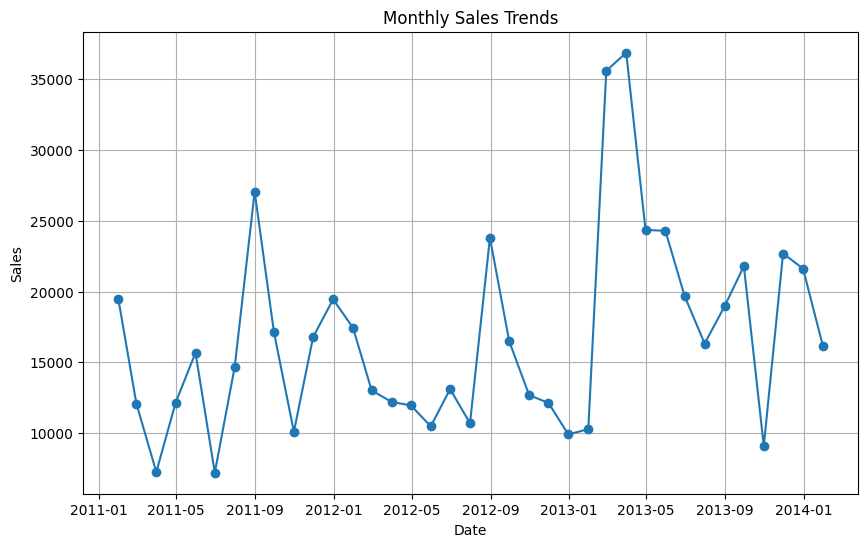

In [ ]:
# 3. Time Series Analysis

#converting data type to datetime for order date and ship date
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.set_index('Order Date', inplace=True)
monthly_sales = data['Sales'].resample('M').sum()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

**CUSTOMER ANALYSIS**

Demographic

Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Region

In [ ]:
#Customer Analysis

data['Customer ID'].value_counts()

PP-18955    23
WB-21850    22
AH-10690    16
KD-16270    16
MA-17560    15
            ..
BD-11500     1
RD-19660     1
LC-16885     1
JK-15640     1
LE-16810     1
Name: Customer ID, Length: 645, dtype: int64

In [ ]:
data['Customer Name'].value_counts()

Paul Prost         23
William Brown      22
Anna Häberlin      16
Karen Daniels      16
Matt Abelman       15
                   ..
Bradley Drucker     1
Robert Dilbeck      1
Lena Creighton      1
Jim Kriz            1
Laurel Elliston     1
Name: Customer Name, Length: 645, dtype: int64

In [ ]:
#sales based on customer name and ID

cust=data.groupby(['Customer ID','Customer Name'])['Sales'].sum()
print('\nSale based on Customer ID and Name : ')
print(cust)


Sale based on Customer ID and Name : 
Customer ID  Customer Name     
AA-10315     Alex Avila            4433.032
AA-10375     Allen Armold           200.386
AA-10480     Andrew Allen            27.460
AA-10645     Anna Andreadi         1995.745
AB-10015     Aaron Bergman          873.532
                                     ...   
XP-21865     Xylona Preis           693.102
YC-21895     Yoseph Carroll        1587.180
YS-21880     Yana Sorensen          923.140
ZC-21910     Zuschuss Carroll      3083.024
ZD-21925     Zuschuss Donatelli    1187.744
Name: Sales, Length: 645, dtype: float64


In [ ]:
#Size of segment

segment=data.groupby('Segment').size()
print('Customer Segmentation : ')
print(segment)



Customer Segmentation : 
Segment
Consumer       1476
Corporate       760
Home Office     486
dtype: int64


In [ ]:
#sales based on city
City=data.groupby('City')['Sales'].sum()
print('\nCity-wise Sales : ')
print(City)




City-wise Sales : 
City
Albuquerque     255.8500
Alexandria     4468.7000
Allen           259.9420
Amarillo       1055.7528
Anaheim        2240.3000
                 ...    
Wilson            7.3800
Woodbury        607.6500
Woodstock       286.6500
Yonkers        6882.4560
Yuma             44.8560
Name: Sales, Length: 317, dtype: float64


In [ ]:
#sales based on region
Region=data.groupby('Region')['Sales'].sum()
print('\nRegion-wise Sales : ')
print(Region)




Region-wise Sales : 
Region
Central    154788.7226
East       189466.7810
South       99870.8875
West       176561.7195
Name: Sales, dtype: float64


In [ ]:
#sales based on state
State=data.groupby('State')['Sales'].sum()
print('\nState-wise Sales : ')
print(State)


State-wise Sales : 
State
Alabama                   1443.2900
Arizona                   4335.5100
Arkansas                  4291.0300
California              117719.4225
Colorado                  8293.1100
Connecticut               3002.9200
Delaware                  6927.5660
District of Columbia        33.9200
Florida                  20010.0615
Georgia                  12906.1200
Idaho                      964.2560
Illinois                 15527.7030
Indiana                  27548.1300
Iowa                       761.4000
Kansas                    1141.6500
Kentucky                 12163.8500
Louisiana                 1405.9100
Maine                      617.1200
Maryland                  4094.9220
Massachusetts            11135.9050
Michigan                 14792.1950
Minnesota                 8155.3800
Mississippi                537.3700
Missouri                  3340.7400
Montana                    410.1040
Nebraska                   363.5000
Nevada                    3562.2280
N

In [ ]:
#sales based on different postal code
postal=data.groupby('Postal Code')['Sales'].sum()
print('\nPostal code -wise Sales : ')
print(postal)


Postal code -wise Sales : 
Postal Code
1040.0      301.960
1810.0      435.850
1841.0     1818.600
1852.0     3451.750
2038.0     3828.675
             ...   
98502.0     649.600
98632.0      24.850
98661.0     633.176
99207.0    1670.948
99301.0    1771.520
Name: Sales, Length: 386, dtype: float64


**PRODUCT ANALYSIS**

Purchase Behaviour -
Category
Sub-category
product ID & Name
Quantity
Order Priority

In [ ]:
#Purchasing Behaviour of Customers - Product Analysis

category=data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print('\nCategory - wise Sales : ')
print(category)


Category - wise Sales : 
Category
Technology         244553.8250
Furniture          204819.5256
Office Supplies    171314.7600
Name: Sales, dtype: float64


In [ ]:
#sales based on sub-category
subcategory=data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print('\nSub-Category - wise Sales : ')
print(subcategory)


Sub-Category - wise Sales : 
Sub-Category
Phones         97636.7980
Chairs         89922.8580
Tables         59332.6945
Storage        58836.5800
Copiers        53519.1820
Machines       52938.8090
Binders        40701.6390
Accessories    40459.0360
Bookcases      31801.5211
Furnishings    23762.4520
Appliances     22672.3230
Paper          18460.6680
Supplies       11825.1720
Art             9532.6920
Envelopes       4713.5140
Labels          3736.5440
Fasteners        835.6280
Name: Sales, dtype: float64


In [ ]:
#list of products and their counts
data['Product Name'].value_counts()

Staples                                              55
Kingston Digital DataTraveler 16GB USB 2.0            9
Situations Contoured Folding Chairs, 4/Set            8
Acco Perma 4000 Stacking Storage Drawers              8
Avery Non-Stick Binders                               7
                                                     ..
Bush Cubix Collection Bookcases, Fully Assembled      1
Acme Titanium Bonded Scissors                         1
It's Hot Message Books with Stickers, 2 3/4" x 5"     1
Hon Metal Bookcases, Putty                            1
Space Solutions Commercial Steel Shelving             1
Name: Product Name, Length: 1370, dtype: int64

In [ ]:
#sales based on products
product=data.groupby(['Product ID','Product Name'])['Sales'].sum().sort_values(ascending=False)
print('\nProduct - wise Sales : ')
print(product)


Product - wise Sales : 
Product ID       Product Name                                             
TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier                        17499.950
TEC-CO-10001449  Hewlett Packard LaserJet 3310 Copier                         11159.814
TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Printer - 24" Color     8749.950
TEC-MA-10000822  Lexmark MX611dhe Monochrome Laser Printer                     8159.952
TEC-MA-10000045  Zebra ZM400 Thermal Label Printer                             6965.700
                                                                                ...    
OFF-LA-10004559  Avery 49                                                         2.880
OFF-AR-10001026  Sanford Uni-Blazer View Highlighters, Chisel Tip, Yellow         2.200
OFF-BI-10004141  Insertable Tab Indexes For Data Binders                          1.908
OFF-AR-10003087  Staples                                                          1.780
OFF-BI-10000201  Ave

In [ ]:
#count of order priority
order_count_by_priority = data['Order Priority'].value_counts()
print("Order Count by Priority:")
print(order_count_by_priority)

#sales based on order priority
print('\n')
priority=data.groupby(['Order Priority'])['Sales'].sum().sort_values(ascending=False)
print(priority)

Order Count by Priority:
Medium      1568
High         827
Critical     226
Low          101
Name: Order Priority, dtype: int64


Order Priority
Medium      364831.9438
High        179184.8307
Critical     61384.6056
Low          15286.7305
Name: Sales, dtype: float64


**VISUALIZATION**

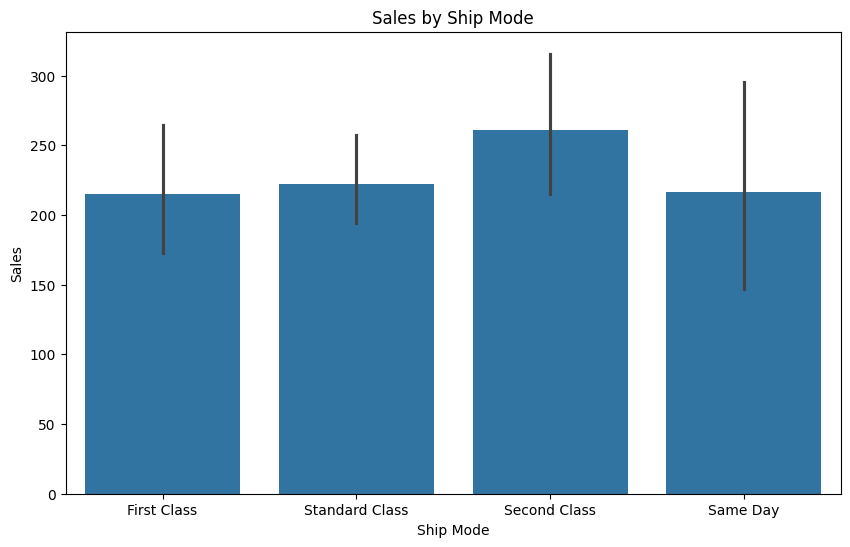

In [ ]:
#visualizing bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Sales', data=data)
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

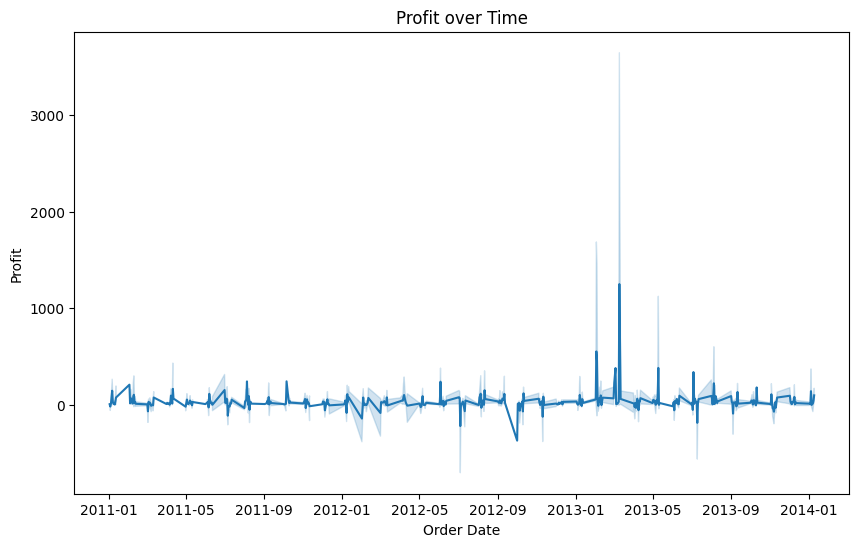

In [ ]:
#visualizing line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Profit', data=data)
plt.title('Profit over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.show()


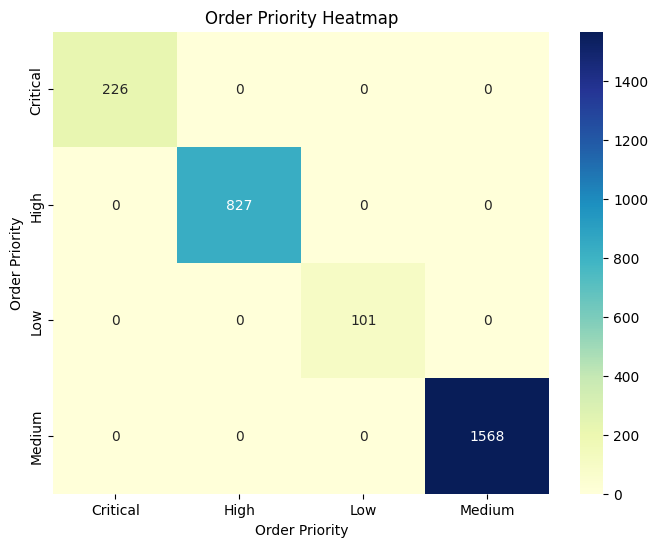

In [ ]:
# Count occurrences of each order priority
order_priority_counts = data['Order Priority'].value_counts().reset_index()

# Rename columns for clarity
order_priority_counts.columns = ['Order Priority', 'Count']

# Create a pivot table for the heatmap
pivot_table = order_priority_counts.pivot_table(index='Order Priority', columns='Order Priority', values='Count', aggfunc=np.sum, fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Order Priority Heatmap')
plt.xlabel('Order Priority')
plt.ylabel('Order Priority')
plt.show()

**RECCOMENDATIONS**

1. Allocate resources and prioritize critical order processing based on priority levels to ensure timely delivery and customer satisfaction
2. Focus on stocking and promoting products that contribute the most to sales revenue, here in the EDA 'Technology' is top selling category. Consider expanding the product range within high-performing categories to meet customer demand.
3. Target specific customer segments based on their purchasing behavior, demographics, and preferences. Offer personalized promotions and discounts to incentivize purchases from different customer segments.